In [1]:
import numpy as np
import pandas as  pd
import tensorflow as tf
from tensorflow import keras
#import keras
import matplotlib.pyplot as plt 
from tensorflow.keras import layers
from sklearn import *
import math
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


## Import Data


In [2]:
data = pd.read_csv("auto-mpg.csv",  on_bad_lines='skip')
data

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
data = data.dropna().drop(columns="car name")
data = pd.get_dummies(data, columns=['origin'], prefix='', prefix_sep='')
data.tail()

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
388,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
391,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [4]:
train_dataset = data.sample(frac=0.6, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [6]:
train_features = train_dataset.copy().astype(np.float32)
test_features = test_dataset.copy().astype(np.float32)

train_labels = train_features.pop('%mpg').astype(np.float32)
test_labels = test_features.pop('%mpg').astype(np.float32)

In [7]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
%mpg,23.128085,7.623332
cylinders,5.519149,1.687895
displacement,196.434043,103.094715
horsepower,104.957447,37.989291
weight,2991.165957,839.469059
acceleration,15.529362,2.600039
model year,75.910638,3.650971
1,0.642553,0.480271
2,0.157447,0.364999
3,0.200000,0.400854


In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [9]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [10]:
dnn_horsepower_model = build_and_compile_model(normalizer)

In [11]:
history = dnn_horsepower_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
6/6 [==============================] - 1s 49ms/step - loss: 606.0391 - val_loss: 477.6588
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 581.4996 - val_loss: 456.7230
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 555.9244 - val_loss: 434.2474
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 527.8373 - val_loss: 409.3037
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 496.4851 - val_loss: 380.7390
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 461.0521 - val_loss: 347.9608
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 419.7449 - val_loss: 311.0229
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 371.7577 - val_loss: 270.4785
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 321.0963 - val_loss: 226.3984
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 264.7119 - val_los

6/6 [==============================] - 0s 7ms/step - loss: 6.6910 - val_loss: 15.0350
Epoch 84/100
6/6 [==============================] - 0s 7ms/step - loss: 6.7029 - val_loss: 15.2668
Epoch 85/100
6/6 [==============================] - 0s 7ms/step - loss: 6.6675 - val_loss: 15.1352
Epoch 86/100
6/6 [==============================] - 0s 8ms/step - loss: 6.6183 - val_loss: 14.9003
Epoch 87/100
6/6 [==============================] - 0s 7ms/step - loss: 6.6290 - val_loss: 14.6575
Epoch 88/100
6/6 [==============================] - 0s 8ms/step - loss: 6.5864 - val_loss: 14.6449
Epoch 89/100
6/6 [==============================] - 0s 9ms/step - loss: 6.5617 - val_loss: 14.7307
Epoch 90/100
6/6 [==============================] - 0s 9ms/step - loss: 6.5597 - val_loss: 14.8093
Epoch 91/100
6/6 [==============================] - 0s 7ms/step - loss: 6.5507 - val_loss: 14.8085
Epoch 92/100
6/6 [==============================] - 0s 8ms/step - loss: 6.5140 - val_loss: 14.7736
Epoch 93/100
6/6 [=====

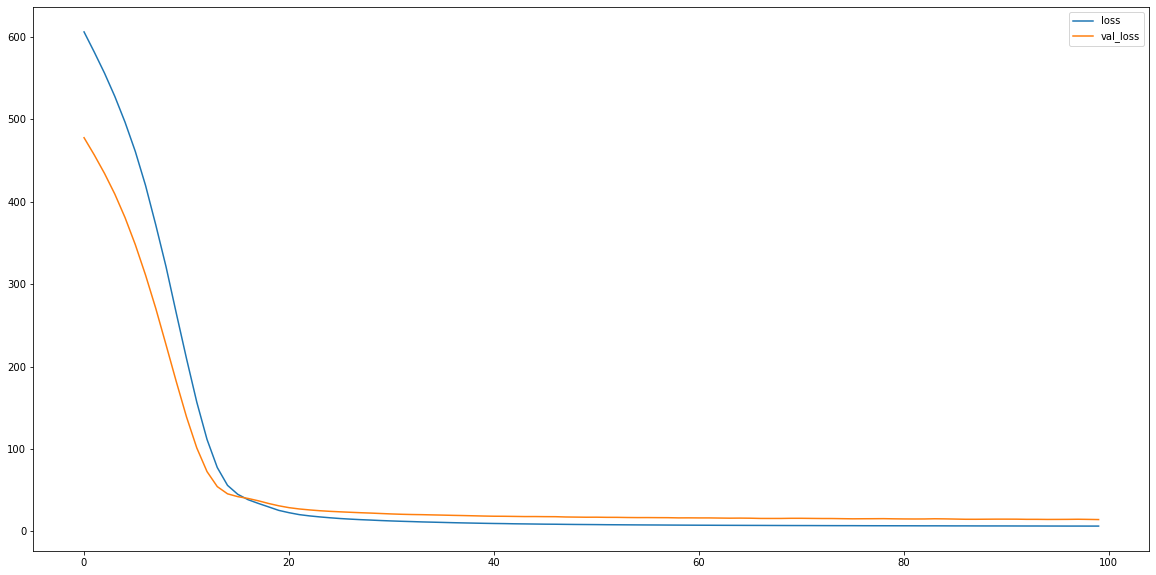

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()


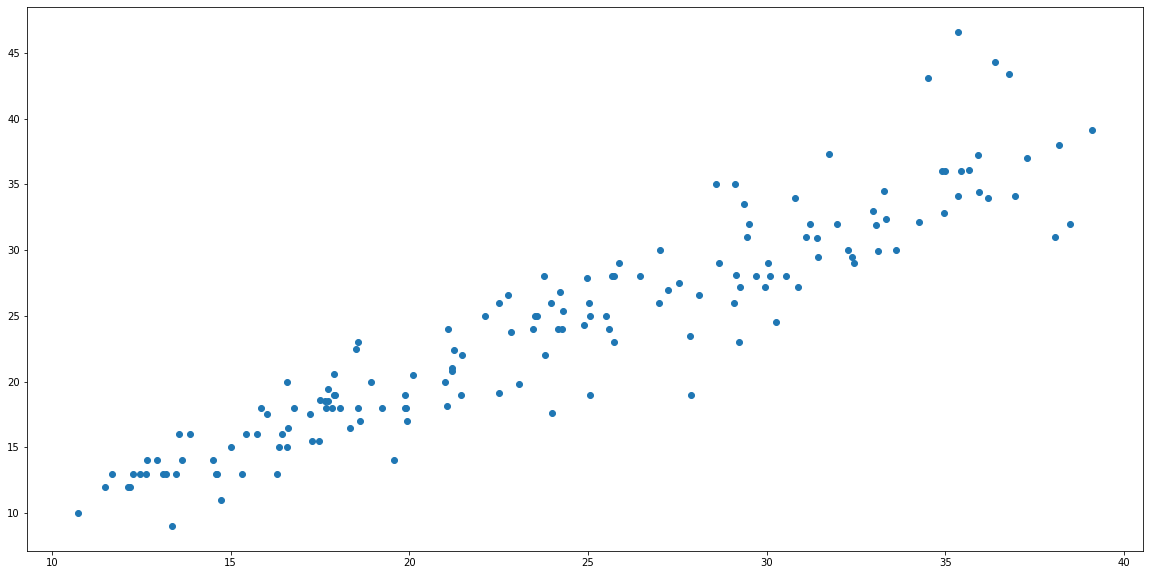

In [13]:
plt.scatter(dnn_horsepower_model.predict(test_features), test_labels)


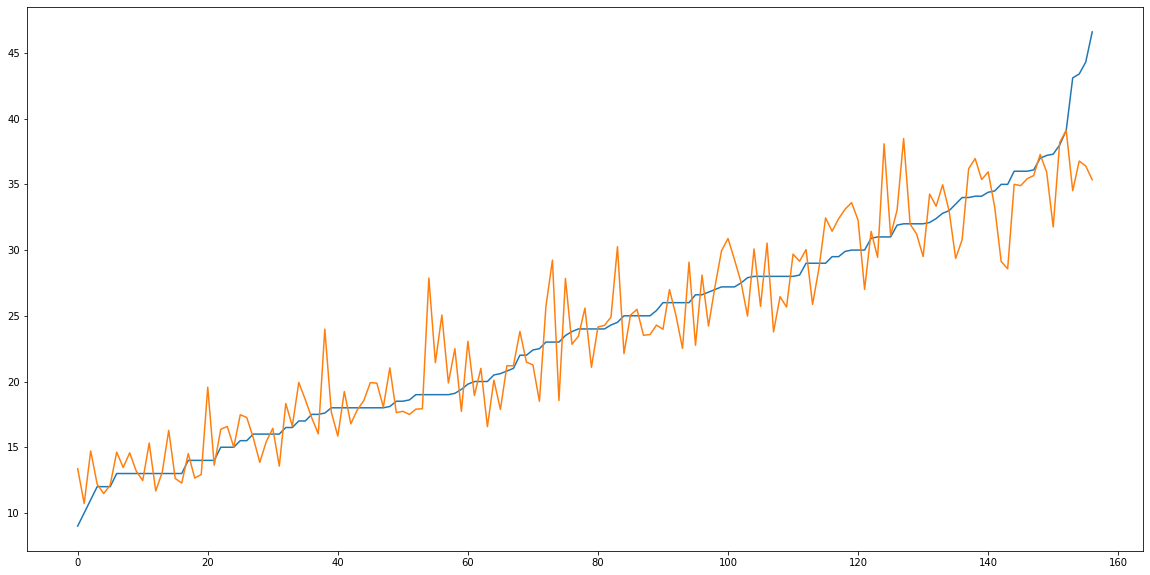

In [14]:

plt.plot(np.sort(test_labels))

plt.plot(dnn_horsepower_model.predict(test_features)[np.argsort(test_labels)])


## Create a sampling layer


In [15]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim)) # Parametrization trick
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon 

## Build the encoder


In [16]:
latent_dim = 2 # Latent Space dimension on the bottleneck
input_dim = train_features.shape[1]
Leaky_ReLu = keras.layers.LeakyReLU(alpha=0.01)

encoder_inputs = keras.Input(shape=( input_dim, ))
x = normalizer(encoder_inputs)
x = layers.Dense(3, activation=Leaky_ReLu)(x)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 9)            19          ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 3)            30          ['normalization[1][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 2)            8           ['dense_3[0][0]']                
                                                                                            

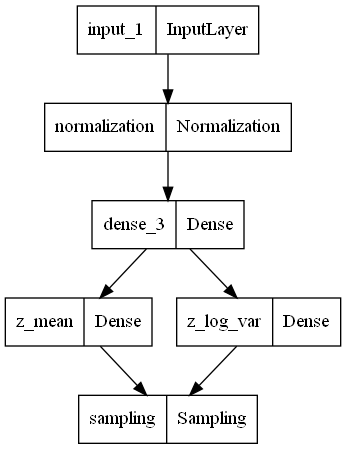

In [17]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(encoder, to_file='encoder.png')

## Build the decoder


In [18]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(5,  activation=Leaky_ReLu)(latent_inputs)
decoder_outputs = layers.Dense(1, activation="linear")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


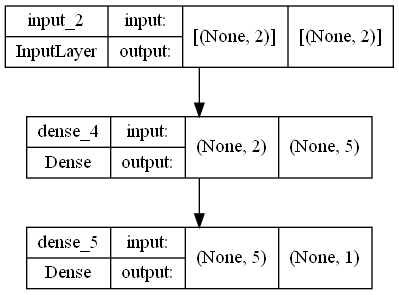

In [19]:
plot_model(decoder,  show_shapes=True, show_layer_names=True)

## Define the VAE as a Model with a custom train_step


In [20]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, KL_hyperparam, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.KL_hyperparam = KL_hyperparam
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")  #MEAN? 
        self.reconstruction_loss_tracker = keras.metrics.Mean(    #MEAN? 
            name="MSE"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")   #MEAN? 
        
        self.total_loss_tracker_val = keras.metrics.Mean(name="total_loss_val")  #MEAN? 
        self.reconstruction_loss_tracker_val = keras.metrics.Mean(    #MEAN? 
            name="MSE_val"
        )
        self.kl_loss_tracker_val = keras.metrics.Mean(name="kl_loss_val")   #MEAN? 

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            
            self.total_loss_tracker_val,
            self.reconstruction_loss_tracker_val,
            self.kl_loss_tracker_val
        ]

    def train_step(self, data):
        x, y_true = data
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x)
            reconstruction = self.decoder(z)
            reconstruction_loss = keras.losses.mean_squared_error(y_true, reconstruction)
            
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            #kl_loss = tf.reduce_mean(kl_loss, axis=1)
            
            total_loss = reconstruction_loss + kl_loss * self.KL_hyperparam
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "MSE": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        # Unpack the data
        x, y_true = data
        # Compute predictions
        z_mean, z_log_var, z = self.encoder(x)
        reconstruction = self.decoder(z)
        
        ## Losses
        reconstruction_loss = keras.losses.mean_squared_error(y_true, reconstruction)
        
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
        
        total_loss = reconstruction_loss + kl_loss * self.KL_hyperparam

        # Updates the metrics tracking the loss
        self.total_loss_tracker_val.update_state(total_loss)
        
        self.reconstruction_loss_tracker_val.update_state(reconstruction_loss)
        
        self.kl_loss_tracker_val.update_state(kl_loss)
        
        return {
            "loss_val": self.total_loss_tracker_val.result(),
            "MSE_val": self.reconstruction_loss_tracker_val.result(),
            "kl_loss_val": self.kl_loss_tracker_val.result(),
        }



    def call(self, inputs):

        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
                


        return reconstruction
    


## Train the VAE

In [21]:
vae = VAE(encoder, decoder, 1)

In [22]:
from keras.optimizers import adam_v2
adam = adam_v2.Adam()




In [23]:
vae.compile(optimizer=adam)

In [24]:
history = vae.fit(train_features,
    train_labels,
    validation_split=0.2,
    epochs=100,
    batch_size=4 )

Epoch 1/100
47/47 [==============================] - 1s 6ms/step - loss: 618.2367 - MSE: 605.8354 - kl_loss: 3.8298 - val_loss_val: 489.8755 - val_MSE_val: 486.9096 - val_kl_loss_val: 3.0253
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 579.9917 - MSE: 591.4338 - kl_loss: 3.3367 - val_loss_val: 481.4711 - val_MSE_val: 478.8403 - val_kl_loss_val: 2.6862
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 601.8230 - MSE: 587.2041 - kl_loss: 3.1766 - val_loss_val: 467.7101 - val_MSE_val: 465.1831 - val_kl_loss_val: 2.5800
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 614.5986 - MSE: 575.5427 - kl_loss: 3.3384 - val_loss_val: 463.2910 - val_MSE_val: 460.7683 - val_kl_loss_val: 2.5712
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 565.0131 - MSE: 549.7689 - kl_loss: 3.6974 - val_loss_val: 445.0875 - val_MSE_val: 442.1521 - val_kl_loss_val: 2.9818
Epoch 6/100
47/47 [==========================

Epoch 44/100
47/47 [==============================] - 0s 2ms/step - loss: 36.5755 - MSE: 24.4341 - kl_loss: 13.4384 - val_loss_val: 32.2230 - val_MSE_val: 21.3379 - val_kl_loss_val: 10.7478
Epoch 45/100
47/47 [==============================] - 0s 2ms/step - loss: 37.8421 - MSE: 21.1255 - kl_loss: 13.3112 - val_loss_val: 28.6193 - val_MSE_val: 17.8254 - val_kl_loss_val: 10.6573
Epoch 46/100
47/47 [==============================] - 0s 2ms/step - loss: 33.8101 - MSE: 22.1488 - kl_loss: 13.3596 - val_loss_val: 34.0416 - val_MSE_val: 23.2868 - val_kl_loss_val: 10.6176
Epoch 47/100
47/47 [==============================] - 0s 2ms/step - loss: 38.9128 - MSE: 22.9495 - kl_loss: 13.2098 - val_loss_val: 28.0665 - val_MSE_val: 17.3628 - val_kl_loss_val: 10.5672
Epoch 48/100
47/47 [==============================] - 0s 2ms/step - loss: 28.4097 - MSE: 17.5389 - kl_loss: 13.1768 - val_loss_val: 29.7388 - val_MSE_val: 19.2340 - val_kl_loss_val: 10.3733
Epoch 49/100
47/47 [==============================

47/47 [==============================] - 0s 3ms/step - loss: 18.5584 - MSE: 12.8436 - kl_loss: 8.7220 - val_loss_val: 21.9577 - val_MSE_val: 14.7481 - val_kl_loss_val: 7.1148
Epoch 88/100
47/47 [==============================] - 0s 2ms/step - loss: 22.7775 - MSE: 11.0034 - kl_loss: 8.7568 - val_loss_val: 17.1279 - val_MSE_val: 10.0903 - val_kl_loss_val: 6.9458
Epoch 89/100
47/47 [==============================] - 0s 2ms/step - loss: 19.2492 - MSE: 10.7783 - kl_loss: 8.4881 - val_loss_val: 19.1144 - val_MSE_val: 12.0745 - val_kl_loss_val: 6.9468
Epoch 90/100
47/47 [==============================] - 0s 2ms/step - loss: 21.2642 - MSE: 11.5867 - kl_loss: 8.4188 - val_loss_val: 21.9185 - val_MSE_val: 15.0218 - val_kl_loss_val: 6.8060
Epoch 91/100
47/47 [==============================] - 0s 2ms/step - loss: 21.2519 - MSE: 12.0266 - kl_loss: 8.4076 - val_loss_val: 24.0481 - val_MSE_val: 17.1503 - val_kl_loss_val: 6.8066
Epoch 92/100
47/47 [==============================] - 0s 2ms/step - loss:

In [25]:
print(history.history.keys())

dict_keys(['loss', 'MSE', 'kl_loss', 'val_loss_val', 'val_MSE_val', 'val_kl_loss_val'])


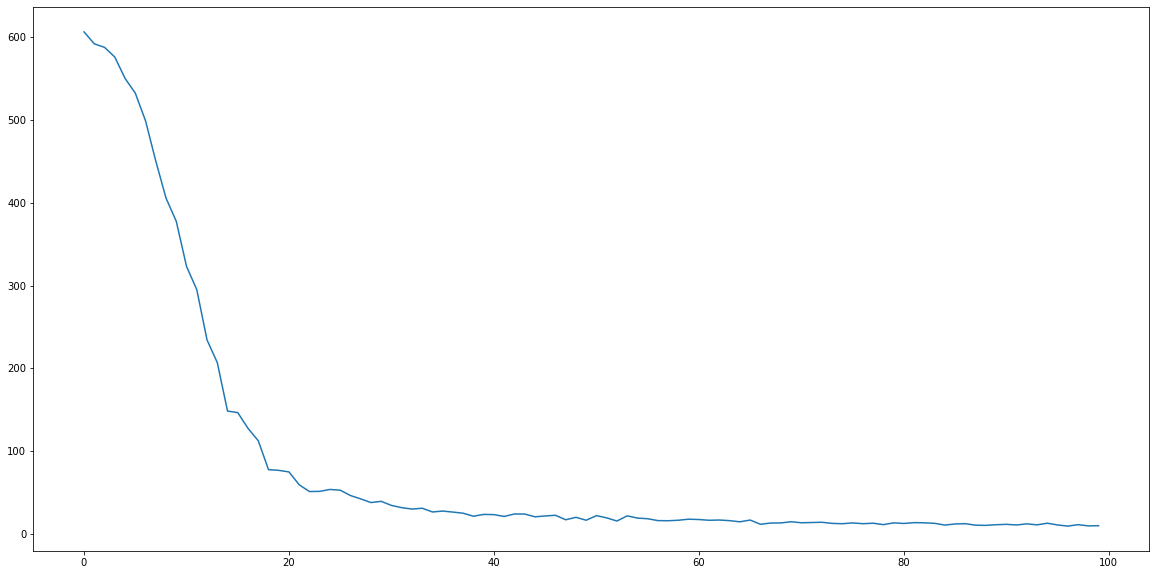

In [26]:
plt.plot(history.history['MSE'])


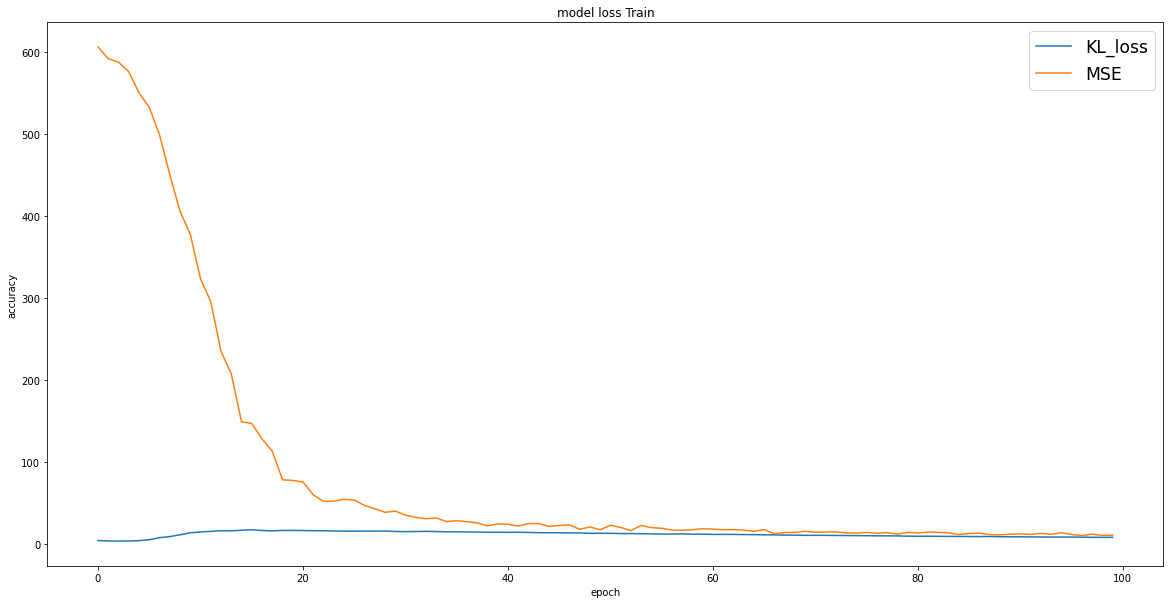

In [27]:
plt.plot(history.history['kl_loss'])
#plt.plot(history.history['val_total_loss'])
plt.title('model loss Train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['MSE'])
plt.legend(['KL_loss', 'MSE'], loc='upper right', fontsize ='xx-large')
plt.show()


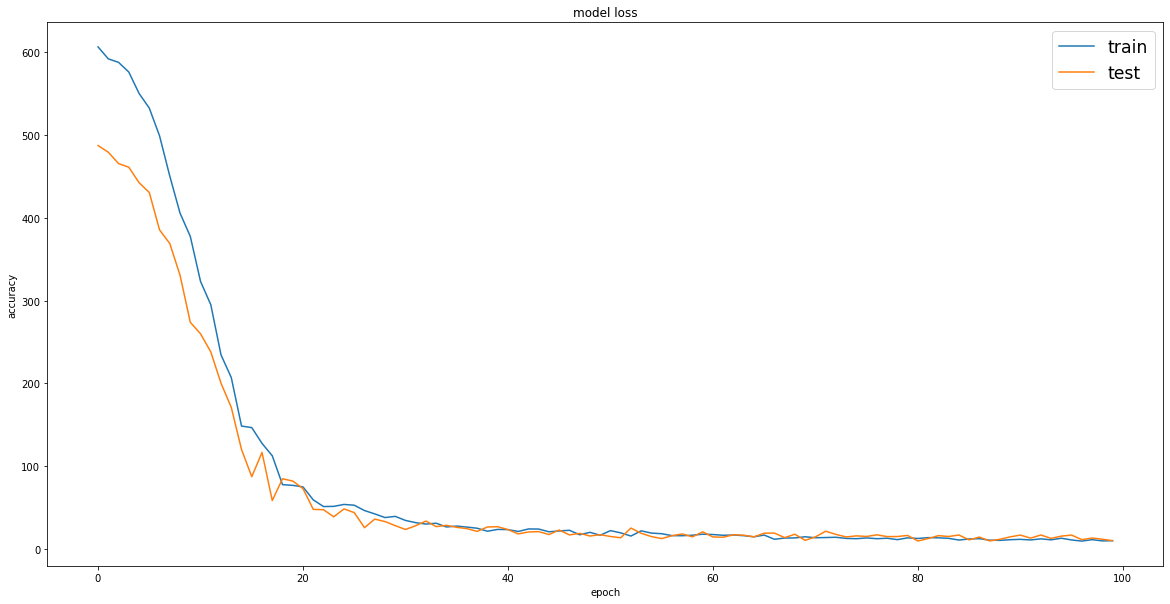

In [28]:
# summarize history for accuracy
plt.plot(history.history['MSE'])
#plt.plot(history.history['val_total_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['val_MSE_val'])

plt.legend(['train', 'test'], loc='upper right', fontsize ='xx-large')
plt.show()


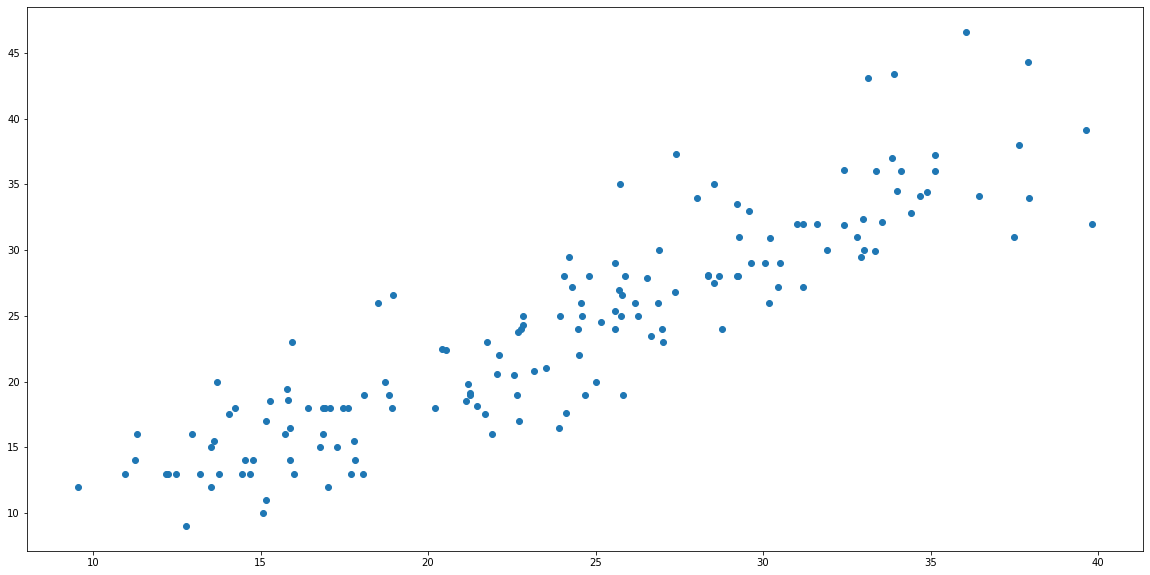

In [29]:
plt.scatter(vae.predict(test_features), test_labels)

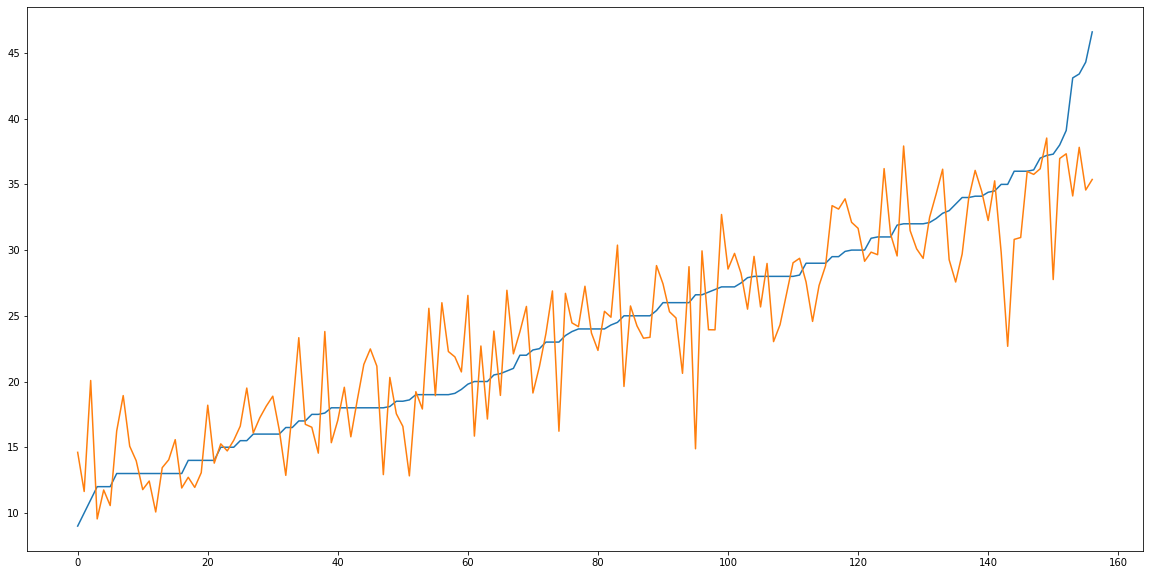

In [30]:
plt.plot(np.sort(test_labels))

plt.plot(vae.predict(test_features)[np.argsort(test_labels)])